### Importation des bibliothèques

In [ ]:
pip install geopy

In [ ]:
pip install seaborn

In [ ]:
pip install matplotlib

In [ ]:
pip install scikit-learn

In [1]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderServiceError
import time
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np

### Importation des données

In [2]:
df = pd.read_csv('paris_listings_2024.csv',on_bad_lines='skip')

In [3]:
# Connaitre la taille du dataset
df.shape

(8000, 20)

In [4]:
#Voir le nombre de colonne
df.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_listings_count',
       'latitude', 'longitude', 'city', 'zipcode', 'state', 'accommodates',
       'room_type', 'bedrooms', 'bathrooms', 'beds', 'price', 'cleaning_fee',
       'security_deposit', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'listing_date'],
      dtype='object')

In [5]:
# Un aperçu de notre données
df.head()

,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,city,zipcode,state,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,listing_date
0,NaN,NaN,1.0,48.88285,2.33852,Paris,75018,Île-de-France,4,Entire home/apt,1.0,1.0,2.0,$65.00,$30.00,$200.00,2,1125,6,2024-04
1,NaN,NaN,1.0,48.86006,2.34768,Paris,75001,Île-de-France,3,Entire home/apt,2.0,1.5,2.0,$98.00,NaN,NaN,5,1124,1,2024-04
2,100%,NaN,3.0,48.88794,2.34532,Paris,75018,Île-de-France,2,Entire home/apt,0.0,1.0,1.0,$65.00,$30.00,"$1,000.00",10,1125,0,2024-04
3,60%,NaN,1.0,48.88868,2.34111,Paris,75018,Île-de-France,2,Private room,1.0,1.0,1.0,$45.00,$30.00,$200.00,5,1125,83,2024-04
4,90%,NaN,1.0,48.88686,2.33670,Paris,75018,Île-de-France,3,Entire home/apt,1.0,1.0,2.0,$65.00,NaN,$200.00,5,365,5,2024-04


In [6]:
# Connaitre les lignes vides
df.isna().sum()

host_response_rate      3000
host_acceptance_rate    8000
host_listings_count        1
latitude                   0
longitude                  0
city                       3
zipcode                   70
state                     23
accommodates               0
room_type                  0
bedrooms                  24
bathrooms                 58
beds                      14
price                      0
cleaning_fee            1750
security_deposit        1680
minimum_nights             0
maximum_nights             0
number_of_reviews          0
listing_date               0
dtype: int64

In [7]:
# Connaitre le type de données de chaque colonne
df.dtypes

host_response_rate       object
host_acceptance_rate    float64
host_listings_count     float64
latitude                float64
longitude               float64
city                     object
zipcode                  object
state                    object
accommodates              int64
room_type                object
bedrooms                float64
bathrooms               float64
beds                    float64
price                    object
cleaning_fee             object
security_deposit         object
minimum_nights            int64
maximum_nights            int64
number_of_reviews         int64
listing_date             object
dtype: object

In [8]:
# Etant données que tous les éléments se concentrent dans la région ile de france ; remplacer tous par ile de france
df['state'].unique()

array(['Île-de-France', 'Pigalle', 'Ile-de-France', 'IDF',
       'Ile de France', nan, 'France', 'Paris province',
       'Región Île-de-France', 'Montmartre', 'île de France',
       'Ile de france', 'Paris', 'IdF', 'Ã\x8ele-de-France',
       'Rhône-Alpes', 'Île de France', 'Ilha de França', 'FRANCE',
       'ile de france', 'le marais', '일 드 프랑스', ' ', 'Pleine de Monceau'],
      dtype=object)

In [9]:
df['state']='Ile-de-France'

In [10]:
#Voir les elements contenue dans la colonne "city"
df['city'].unique()

array(['Paris', 'paris', 'Paris-18E-Arrondissement', 'París',
       'Paris-16E-Arrondissement', 'Boulogne-Billancourt', 'Париж',
       'Paris-10E-Arrondissement', 'Paris 16', 'Bagnolet',
       'Paris-17E-Arrondissement', 'Paris city',
       'Paris-13E-Arrondissement', 'PARIS 05', 'Paris-2E-Arrondissement',
       'Le Kremlin-Bicêtre', 'Clichy', 'Le Pré-Saint-Gervais', 'Paris ',
       'Paris, 4th arrondissement', 'Paris-8E-Arrondissement',
       'Montrouge', 'Paris-11E-Arrondissement', 'Parigi',
       'Charenton Le Pont - limitrophe avec paris ',
       'Paris-19E-Arrondissement', 'Paris 13e Arrondissement',
       'Deuil-la-Barre', 'Vincennes', 'PARIS', 'Saint-Ouen', 'Paris 18e',
       'Levallois-Perret', 'Paris-20E-Arrondissement', ' Deuil-la-Barre ',
       'Gentilly', 'Paris 6e arrondissement', 'Saint-Mandé',
       'Deuil-la-Barre ', 'Issy-les-Moulineaux', 'Issy les moulineaux',
       'Neuilly Sur Seine ', 'Paris 11e arrondissement', 'Paris 01',
       'Pantin', 'Paris 4e 

In [11]:
#Voir les elements contenue dans la colonne "zipcode"
df['zipcode'].unique()

array(['75018', '75001', '75011', '75003', '75015', '75004', '75020',
       '75009', '75012', '75019', '75008', '75010', '75017', '75013',
       '75', '75005', '75014', '75007', '75006', nan, '75016', '700014',
       '75002', '75116', '92100', '93170', '94270', '92110', '92130',
       '93310', '92120', '75018e', '94220', '95170', '94300', '93400',
       '92300', '94250', '92240', '94160', '92200', '75011\n75011',
       '93500', 'Paris 75004', '92170', '78008'], dtype=object)

In [12]:
# Pour les Villes incrompréhensible , utiliser les données de code postal pour trouver déterminer la bonne Ville en utilisant la bibliothèque geopy
# Initialiser le géocodeur avec un agent utilisateur unique
geolocator = Nominatim(user_agent="my_unique_app_name")
# Fonction pour obtenir le code postal
def get_postal_code(lat, lon):
    try:
        location = geolocator.reverse((lat, lon), exactly_one=True)
        if location and 'postcode' in location.raw['address']:
            return location.raw['address']['postcode']
        else:
            return "Code postal non trouvé."
    except GeocoderServiceError as e:
        print(f"Erreur du service de géocodage: {e}")
        return None


# Remplacer les valeurs manquantes dans 'zipcode' avec les codes postaux obtenus
for index, row in df.iterrows():
    # Vérifie si le code postal est vide, NaN, ne commence pas par '75' ou différent de celui obtenu par l'API
    if (pd.isna(row['zipcode']) or row['zipcode'].strip() == '' or not row['zipcode'].startswith('75') or row['zipcode']=='75' or len(row['zipcode'])>5):
        code_postal = get_postal_code(row['latitude'], row['longitude'])
        if code_postal != "Code postal non trouvé." and code_postal != row['zipcode']:
            df.at[index, 'zipcode'] = code_postal
            print(f"Remplacement du code postal pour l'index {index}: {code_postal}")
        else:
            print(f"Le code postal pour l'index {index} est déjà correct ou introuvable: {row['zipcode']}")
        time.sleep(1)  # Pause de 1 seconde entre les requêtes pour respecter les limites de l'API


Remplacement du code postal pour l'index 50: 75012
Remplacement du code postal pour l'index 113: 75010
Remplacement du code postal pour l'index 132: 75003
Remplacement du code postal pour l'index 263: 75011
Remplacement du code postal pour l'index 322: 75010
Remplacement du code postal pour l'index 405: 75016
Remplacement du code postal pour l'index 468: 75005
Remplacement du code postal pour l'index 471: 75015
Remplacement du code postal pour l'index 558: 75010
Remplacement du code postal pour l'index 576: 75008
Remplacement du code postal pour l'index 634: 75116
Remplacement du code postal pour l'index 659: 75012
Remplacement du code postal pour l'index 684: 75003
Le code postal pour l'index 854 est déjà correct ou introuvable: 93170
Remplacement du code postal pour l'index 939: 75007
Remplacement du code postal pour l'index 1036: 75011
Remplacement du code postal pour l'index 1178: 75013
Remplacement du code postal pour l'index 1183: 75017
Remplacement du code postal pour l'index 11

In [13]:
# Créer un masque pour les codes postaux commençant par '75'
mask = df['zipcode'].notna() & df['zipcode'].str.startswith('75')

# Remplacer les valeurs dans la colonne 'city' en utilisant le masque
df.loc[mask, 'city'] = 'Paris ' + df.loc[mask, 'zipcode'].str[-2:]

In [14]:
# Voir les élements nulls
df.isna().sum()

host_response_rate      3000
host_acceptance_rate    8000
host_listings_count        1
latitude                   0
longitude                  0
city                       0
zipcode                    0
state                      0
accommodates               0
room_type                  0
bedrooms                  24
bathrooms                 58
beds                      14
price                      0
cleaning_fee            1750
security_deposit        1680
minimum_nights             0
maximum_nights             0
number_of_reviews          0
listing_date               0
dtype: int64

In [15]:
df.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_listings_count',
       'latitude', 'longitude', 'city', 'zipcode', 'state', 'accommodates',
       'room_type', 'bedrooms', 'bathrooms', 'beds', 'price', 'cleaning_fee',
       'security_deposit', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'listing_date'],
      dtype='object')

In [16]:
df.head()

,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,city,zipcode,state,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,listing_date
0,NaN,NaN,1.0,48.88285,2.33852,Paris 18,75018,Ile-de-France,4,Entire home/apt,1.0,1.0,2.0,$65.00,$30.00,$200.00,2,1125,6,2024-04
1,NaN,NaN,1.0,48.86006,2.34768,Paris 01,75001,Ile-de-France,3,Entire home/apt,2.0,1.5,2.0,$98.00,NaN,NaN,5,1124,1,2024-04
2,100%,NaN,3.0,48.88794,2.34532,Paris 18,75018,Ile-de-France,2,Entire home/apt,0.0,1.0,1.0,$65.00,$30.00,"$1,000.00",10,1125,0,2024-04
3,60%,NaN,1.0,48.88868,2.34111,Paris 18,75018,Ile-de-France,2,Private room,1.0,1.0,1.0,$45.00,$30.00,$200.00,5,1125,83,2024-04
4,90%,NaN,1.0,48.88686,2.33670,Paris 18,75018,Ile-de-France,3,Entire home/apt,1.0,1.0,2.0,$65.00,NaN,$200.00,5,365,5,2024-04


In [17]:
paris_listings=df.copy()

In [18]:
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   host_response_rate    5000 non-null   object 
 1   host_acceptance_rate  0 non-null      float64
 2   host_listings_count   7999 non-null   float64
 3   latitude              8000 non-null   float64
 4   longitude             8000 non-null   float64
 5   city                  8000 non-null   object 
 6   zipcode               8000 non-null   object 
 7   state                 8000 non-null   object 
 8   accommodates          8000 non-null   int64  
 9   room_type             8000 non-null   object 
 10  bedrooms              7976 non-null   float64
 11  bathrooms             7942 non-null   float64
 12  beds                  7986 non-null   float64
 13  price                 8000 non-null   object 
 14  cleaning_fee          6250 non-null   object 
 15  security_deposit     

In [19]:
# nettoyer les colonnes "price & cleaning_fee & security_deposit"
paris_listings['price'] = paris_listings['price'].str.replace(',', '').str.replace('$', '')
paris_listings['cleaning_fee'] = paris_listings['cleaning_fee'].str.replace(',', '').str.replace('$', '')
paris_listings['security_deposit'] = paris_listings['security_deposit'].str.replace(',', '').str.replace('$', '')

C:\Users\Mohamed Abdi\AppData\Local\Temp\ipykernel_6472\876615004.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  paris_listings['price'] = paris_listings['price'].str.replace(',', '').str.replace('$', '')
C:\Users\Mohamed Abdi\AppData\Local\Temp\ipykernel_6472\876615004.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  paris_listings['cleaning_fee'] = paris_listings['cleaning_fee'].str.replace(',', '').str.replace('$', '')
C:\Users\Mohamed Abdi\AppData\Local\Temp\ipykernel_6472\876615004.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal s

In [20]:
# convertir ces colonnes au bon type
paris_listings['price'] = paris_listings['price'].astype(float)
paris_listings['cleaning_fee'] = paris_listings['cleaning_fee'].astype(float)
paris_listings['security_deposit'] = paris_listings['security_deposit'].astype(float)

In [21]:
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   host_response_rate    5000 non-null   object 
 1   host_acceptance_rate  0 non-null      float64
 2   host_listings_count   7999 non-null   float64
 3   latitude              8000 non-null   float64
 4   longitude             8000 non-null   float64
 5   city                  8000 non-null   object 
 6   zipcode               8000 non-null   object 
 7   state                 8000 non-null   object 
 8   accommodates          8000 non-null   int64  
 9   room_type             8000 non-null   object 
 10  bedrooms              7976 non-null   float64
 11  bathrooms             7942 non-null   float64
 12  beds                  7986 non-null   float64
 13  price                 8000 non-null   float64
 14  cleaning_fee          6250 non-null   float64
 15  security_deposit     

In [22]:
# Exemple de création de la colonne 'location'
paris_listings['location'] = paris_listings['zipcode'].apply(lambda x: 'Inside Paris' if str(x).startswith('75') else 'Outside Paris')

In [23]:
location_counts = paris_listings['location'].value_counts().reset_index()
location_counts.columns = ['Location', 'Number of Listings']

In [24]:
location_counts

,Location,Number of Listings
0,Inside Paris,7997
1,Outside Paris,3


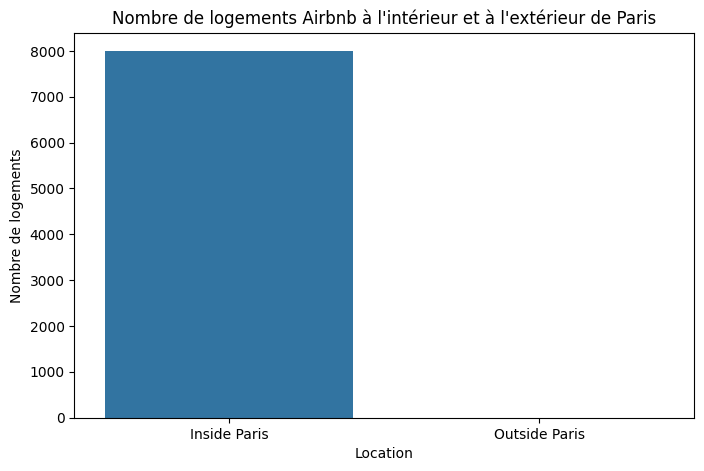

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x='Location', y='Number of Listings', data=location_counts)
plt.title('Nombre de logements Airbnb à l\'intérieur et à l\'extérieur de Paris')
plt.xlabel('Location')
plt.ylabel('Nombre de logements')
plt.show()

Les logements à l'exterieur sont négligeable par rapport à ceux qui sont à l'intérieur donc je vais les logements à l'intérieur

In [26]:
paris_listings=paris_listings[paris_listings['location']=='Inside Paris']

In [27]:
# Supprimer les colonnes inutiles
paris_listings.drop(['longitude','latitude','zipcode','host_response_rate','host_acceptance_rate','host_listings_count','listing_date','location'],axis=1,inplace=True)

In [28]:
paris_listings.isna().sum()

city                    0
state                   0
accommodates            0
room_type               0
bedrooms               24
bathrooms              58
beds                   14
price                   0
cleaning_fee         1749
security_deposit     1680
minimum_nights          0
maximum_nights          0
number_of_reviews       0
dtype: int64

In [29]:
paris_listings.groupby('city').apply(lambda x: x.isna().sum())

,city,state,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews
city,,,,,,,,,,,,,
Paris 01,0,0,0,0,1,0,0,0,27,28,0,0,0
Paris 02,0,0,0,0,1,2,0,0,33,45,0,0,0
Paris 03,0,0,0,0,3,3,0,0,60,53,0,0,0
Paris 04,0,0,0,0,0,3,2,0,43,50,0,0,0
Paris 05,0,0,0,0,0,2,1,0,72,56,0,0,0
Paris 06,0,0,0,0,2,1,0,0,36,43,0,0,0
Paris 07,0,0,0,0,0,0,0,0,34,35,0,0,0
Paris 08,0,0,0,0,0,0,0,0,38,29,0,0,0
Paris 09,0,0,0,0,2,1,0,0,73,78,0,0,0


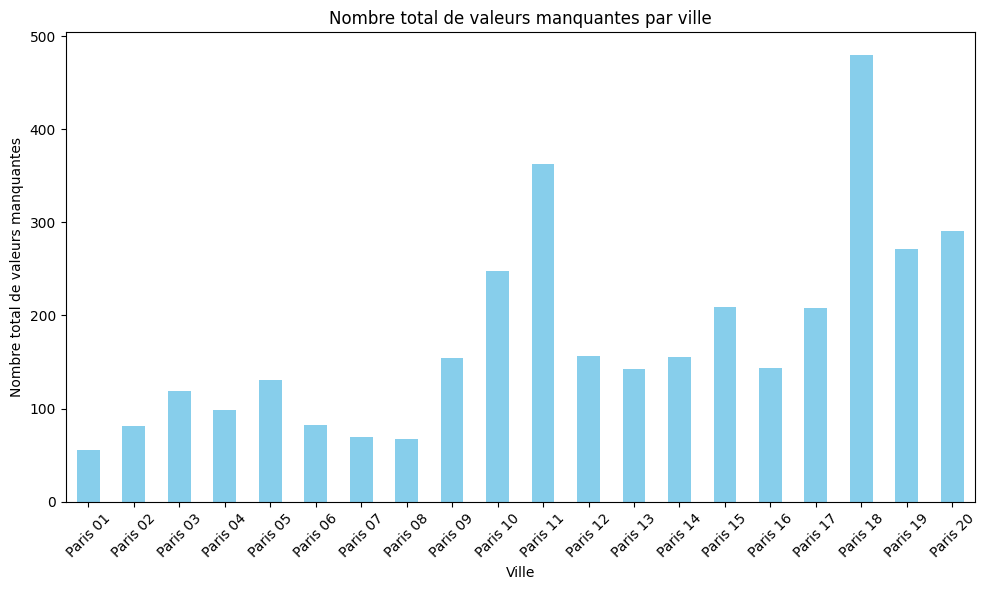

In [30]:
# Calculer le nombre total de valeurs manquantes par ville
missing_values_total = paris_listings.isna().sum(axis=1).groupby(df['city']).sum()

# Créer un graphique à barres pour montrer les valeurs manquantes par ville
plt.figure(figsize=(10, 6))
missing_values_total.plot(kind='bar', color='skyblue')
plt.title('Nombre total de valeurs manquantes par ville')
plt.xlabel('Ville')
plt.ylabel('Nombre total de valeurs manquantes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

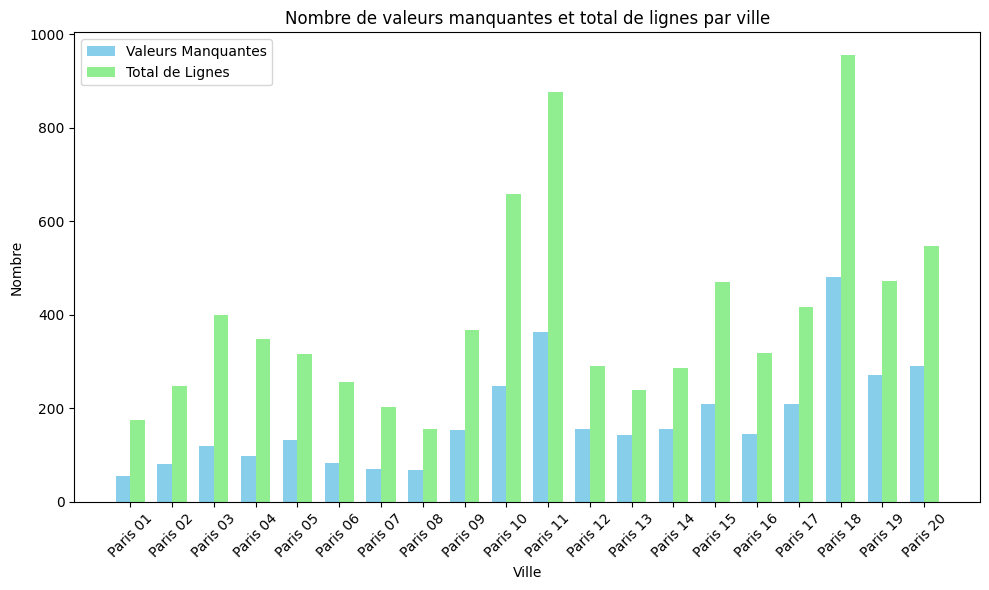

In [31]:
# Calculer le nombre total de valeurs manquantes par ville
total_missing_by_city = paris_listings.isna().sum(axis=1).groupby(df['city']).sum()

# Calculer le nombre total de lignes par ville
total_rows_by_city = paris_listings.groupby('city').size()

# Créer un graphique à barres
fig, ax = plt.subplots(figsize=(10, 6))

# Indices pour chaque groupe de barres
indices = np.arange(len(total_missing_by_city))

# Largeur des barres
width = 0.35

# Barres pour les valeurs manquantes
ax.bar(indices - width/2, total_missing_by_city, width, label='Valeurs Manquantes', color='skyblue')

# Barres pour le total de lignes
ax.bar(indices + width/2, total_rows_by_city, width, label='Total de Lignes', color='lightgreen')

# Ajouter des titres et des étiquettes
ax.set_title('Nombre de valeurs manquantes et total de lignes par ville')
ax.set_xlabel('Ville')
ax.set_ylabel('Nombre')
ax.set_xticks(indices)
ax.set_xticklabels(total_missing_by_city.index, rotation=45)

# Ajouter une légende
ax.legend()

# Afficher le graphique
plt.tight_layout()
plt.show()

In [32]:
# Calculer le nombre total de valeurs manquantes par ville
total_missing_by_city = paris_listings.isna().sum(axis=1).groupby(df['city']).sum()

# Calculer le nombre total de lignes par ville
total_rows_by_city = paris_listings.groupby('city').size()

# Créer un nouveau DataFrame avec ces informations
data_summary = pd.DataFrame({
    'Total de Lignes': total_rows_by_city,
    'Valeurs Manquantes': total_missing_by_city
})

# Réinitialiser l'index si vous voulez 'city' comme une colonne
data_summary.reset_index(inplace=True)
data_summary.rename(columns={'index': 'Ville'}, inplace=True)

In [33]:
data_summary['% Valeurs Manquantes'] = (data_summary['Valeurs Manquantes'] / data_summary['Total de Lignes']) * 100
data_summary['% Valeurs Manquantes'] = data_summary['% Valeurs Manquantes'].round(2)

In [34]:
data_summary

,city,Total de Lignes,Valeurs Manquantes,% Valeurs Manquantes
0,Paris 01,175,56,32.00
1,Paris 02,247,81,32.79
2,Paris 03,400,119,29.75
3,Paris 04,347,98,28.24
4,Paris 05,316,131,41.46
5,Paris 06,256,82,32.03
6,Paris 07,203,69,33.99
7,Paris 08,156,67,42.95
8,Paris 09,367,154,41.96
9,Paris 10,658,248,37.69


In [35]:
# Calcul du nombre total de valeurs manquantes et non manquantes
total_valeurs_manquantes = data_summary['Valeurs Manquantes'].sum()
total_valeurs_non_manquantes = data_summary['Total de Lignes'].sum() - total_valeurs_manquantes

# Création d'un DataFrame pour ces totaux
total_data = pd.DataFrame({
    'Type': ['Valeurs Non Manquantes', 'Valeurs Manquantes'],
    'Total': [total_valeurs_non_manquantes, total_valeurs_manquantes]
})

# Affichage du DataFrame
print(total_data)

                     Type  Total
0  Valeurs Non Manquantes   4472
1      Valeurs Manquantes   3525


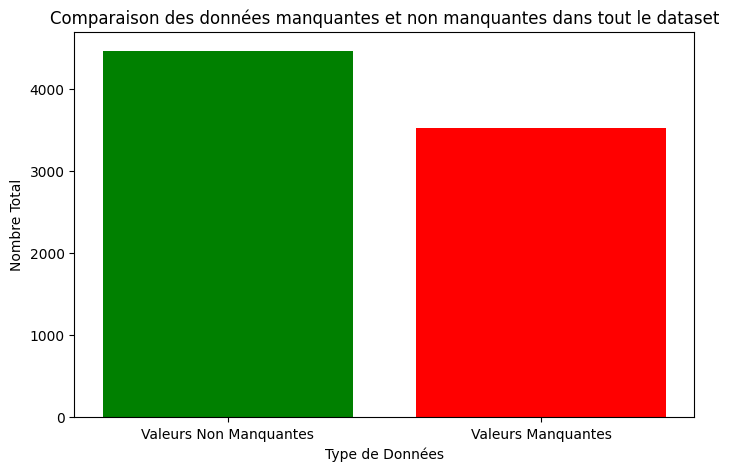

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(total_data['Type'], total_data['Total'], color=['green', 'red'])
plt.title('Comparaison des données manquantes et non manquantes dans tout le dataset')
plt.xlabel('Type de Données')
plt.ylabel('Nombre Total')
plt.show()

In [37]:
# On supprime les valeurs manquantes
paris_listings.dropna(subset=['cleaning_fee','security_deposit','bedrooms','bathrooms','beds'],inplace=True)

In [38]:
paris_listings.shape

(5505, 13)

In [39]:
paris_listings.columns

Index(['city', 'state', 'accommodates', 'room_type', 'bedrooms', 'bathrooms',
       'beds', 'price', 'cleaning_fee', 'security_deposit', 'minimum_nights',
       'maximum_nights', 'number_of_reviews'],
      dtype='object')

In [41]:
# Séparer les caractéristiques catégorielles et numériques
features_numeriques = paris_listings[['accommodates', 'bedrooms', 'bathrooms', 'beds', 'price', 'cleaning_fee', 'security_deposit', 'minimum_nights', 'maximum_nights', 'number_of_reviews']]
features_categorielles = paris_listings[['room_type']]

# Encoder les caractéristiques catégorielles avec one-hot encoding
features_categorielles_encoded = pd.get_dummies(features_categorielles)
features_categorielles_encoded.reset_index(drop=True, inplace=True)
# Normaliser les caractéristiques numériques
scaler = StandardScaler()
features_numeriques_scaled = scaler.fit_transform(features_numeriques)
features_numeriques_scaled = pd.DataFrame(features_numeriques_scaled, columns=features_numeriques.columns)
features_numeriques_scaled.reset_index(drop=True, inplace=True)


In [42]:
correlation_matrix=features_numeriques_scaled.corr()

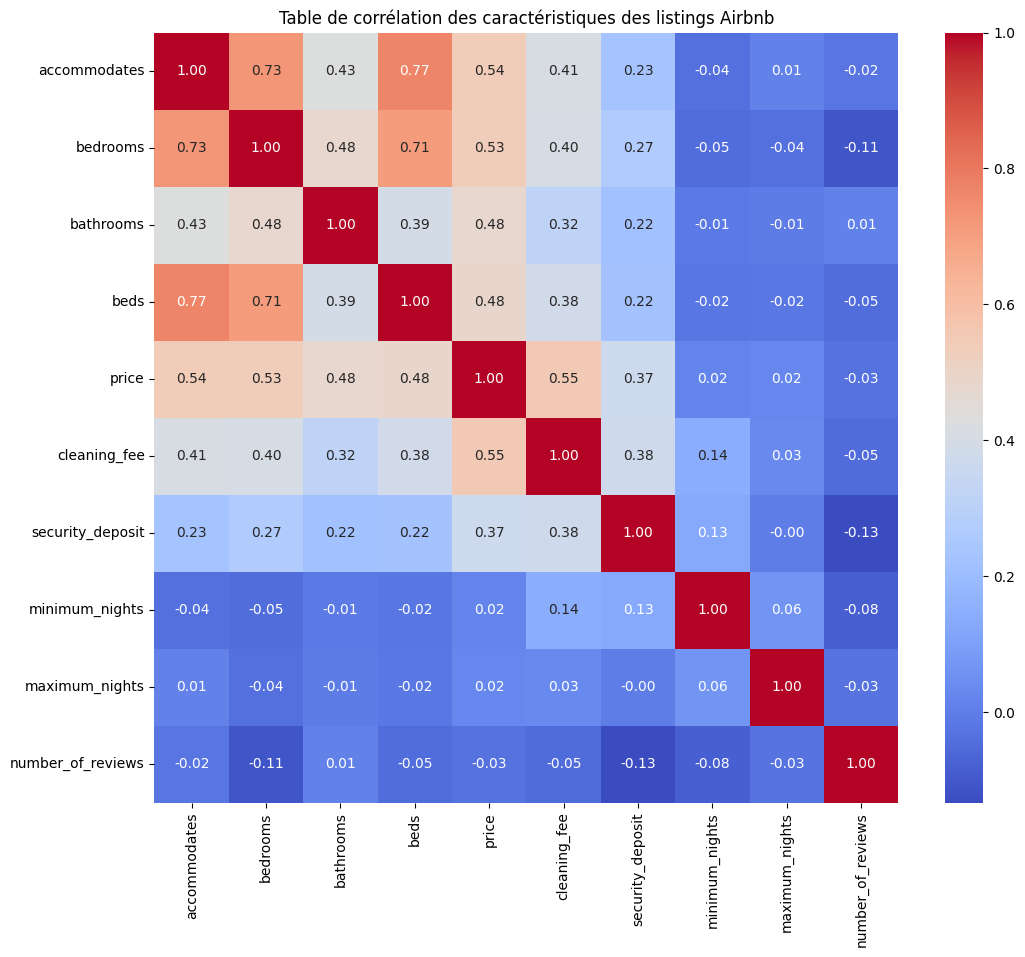

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Table de corrélation des caractéristiques des listings Airbnb')
plt.show()

In [44]:
# Concaténer les caractéristiques numériques scalées avec les catégorielles encodées
df_final = pd.concat([features_numeriques_scaled, features_categorielles_encoded], axis=1)

In [45]:
df_final.isna().sum()

accommodates                 0
bedrooms                     0
bathrooms                    0
beds                         0
price                        0
cleaning_fee                 0
security_deposit             0
minimum_nights               0
maximum_nights               0
number_of_reviews            0
room_type_Entire home/apt    0
room_type_Private room       0
room_type_Shared room        0
dtype: int64

In [46]:
X = df_final.drop('price', axis=1)
y = df_final['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [47]:
X

,accommodates,bedrooms,bathrooms,beds,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0.399561,-0.351677,-0.313044,0.126800,-0.383533,-0.532881,-0.222645,1.118551,-0.629294,1,0,0
1,-0.821412,-1.506799,-0.313044,-0.672782,-0.383533,1.104443,0.042858,1.118551,-0.715642,1,0,0
2,-0.821412,-0.351677,-0.313044,-0.672782,-0.383533,-0.532881,-0.123081,1.118551,0.478837,0,1,0
3,0.399561,-0.351677,-0.313044,0.126800,-0.066252,-0.328215,-0.189457,-0.883987,1.011316,1,0,0
4,-0.821412,-0.351677,1.802743,-0.672782,0.568311,-0.532881,0.706615,-0.271338,-0.341468,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5500,-0.821412,-0.351677,-0.313044,-0.672782,-0.542173,0.081116,-0.189457,-0.755971,-0.125598,1,0,0
5501,0.399561,0.803444,-0.313044,1.725964,-0.383533,-0.430548,-0.189457,1.118551,0.090272,1,0,0
5502,0.399561,-0.351677,-0.313044,0.126800,-1.335377,-0.123550,-0.056706,-0.926049,-0.715642,1,0,0
5503,-0.821412,-1.506799,-0.313044,-0.672782,-0.700814,-0.737546,-0.222645,1.118551,-0.686859,1,0,0


In [48]:
y

0      -0.558110
1      -0.558110
2      -0.757568
3      -0.328734
4      -0.059466
          ...   
5500   -0.408517
5501   -0.159195
5502   -0.488300
5503   -0.219032
5504    1.087416
Name: price, Length: 5505, dtype: float64

# Définition des modèles

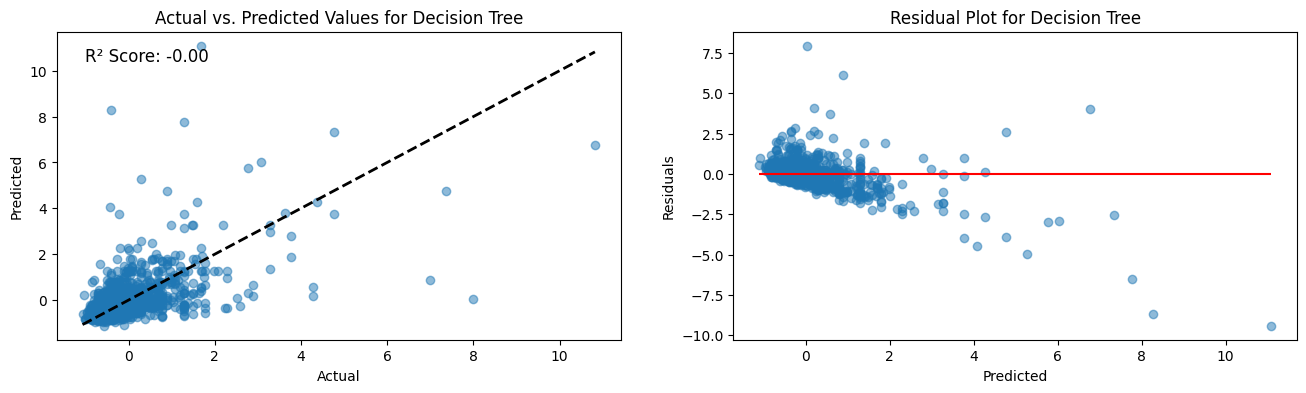

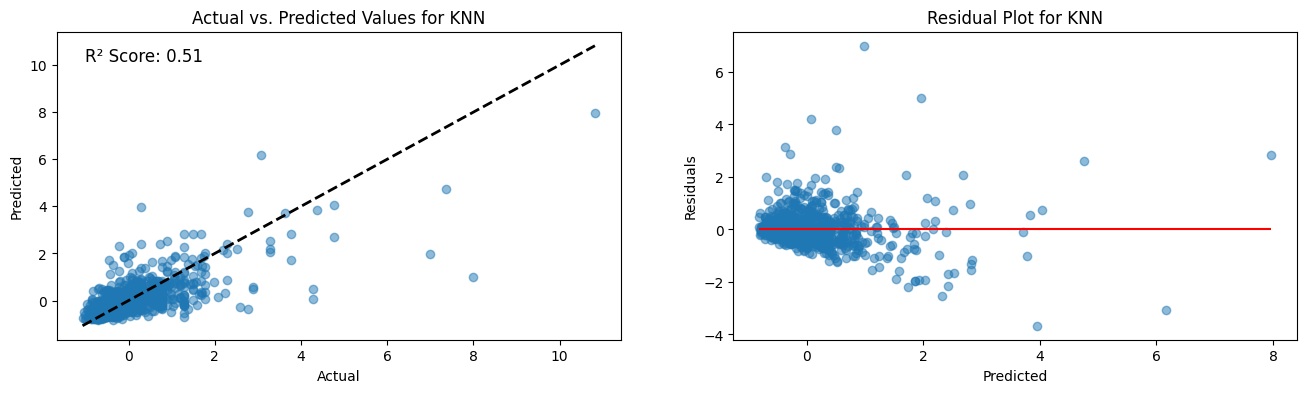

           Model       MSE      RMSE       MAE        R2   CV Mean    CV Std
0  Decision Tree  0.844536  0.918986  0.524907 -0.001878  0.065596  0.122793
1            KNN  0.412149  0.641988  0.384058  0.511065  0.490641  0.031910


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Définition des modèles
models = {
    "Decision Tree": DecisionTreeRegressor(),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

results = []
best_model = None
best_mse = float('inf')

# Entraîner, évaluer et visualiser chaque modèle
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calcul des résidus
    residuals = y_test - y_pred
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    
    results.append({
        "Model": name,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2,
        "CV Mean": cv_scores.mean(),
        "CV Std": cv_scores.std()
    })
    
    if mse < best_mse:
        best_mse = mse
        best_model = model

    # Création des sous-graphiques
    fig, axs = plt.subplots(1, 2, figsize=(16, 4))
    
    # Tracé des valeurs réelles vs prédites
    axs[0].scatter(y_test, y_pred, alpha=0.5)
    axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    axs[0].set_xlabel('Actual')
    axs[0].set_ylabel('Predicted')
    axs[0].set_title(f'Actual vs. Predicted Values for {name}')
    axs[0].text(0.05, 0.95, f'R² Score: {r2:.2f}', transform=axs[0].transAxes, fontsize=12, verticalalignment='top')

    # Tracé du graphique des résidus
    axs[1].scatter(y_pred, residuals, alpha=0.5)
    axs[1].hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red')
    axs[1].set_xlabel('Predicted')
    axs[1].set_ylabel('Residuals')
    axs[1].set_title(f'Residual Plot for {name}')
    
    plt.show()

results_df = pd.DataFrame(results)
print(results_df)
